In [67]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#General information about GEM dataset

Link to code explanation/interpratation: https://panopto.aau.dk/Panopto/Pages/Viewer.aspx?id=6fcf2967-b7c3-4886-aa41-b1e300bba673

**Global Entrepreneurship Monitor (GEM)**

Link to dataset: https://github.com/aaubs/ds-master/blob/main/data/assignments_datasets/GEM/GEM%202020%20APS%20Global%20Individual%20Level%20Data_Jan2022.parquet

This dataset is the world's foremost study of global entrepereurship. Its primary goal is to explore the entrepreneurial behavior of individuals, how entrepreneurship affects national economic development, and the various factors that promote or hinder entrepreneurial activity across different countries and regions.

The Global Entrepreneurship Monitor plays a crucial role in advancing the understanding of entrepreneurship’s role in economic development and social progress. Its data is valuable for researchers, policymakers, educators, and business leaders who seek to foster entrepreneurial ecosystems that drive innovation, job creation, and economic growth.

**Research focus**

In general i am curious about the relation between multipple chosen values and how they might relate. However what I am most curious about is fear of failure and its relation to other highlighted columns whithin the specified dataset (df). In order to satiate my curiosity in these matters i will ascess the data, potentially clean-up the data, perform descriptive statistics, and dig further into my chosen research focus.

This dataset explores the relationship between fear of failure and other factors like age and gender in aspiring entrepreneurs. Moreover, which potential causality is there between fear of failure and their evaluvation of their

**List of collumns in dataset**

'gender' = Gender (1-Male & 2-Female)

'gemeduc' = Measures the respondents education-level

'fearfaill' = Respondent's fear of failure

'suskilll' = Measure of weather the respondent believes they have the sufficient skill to start a business

'proact' = Whether the respondent is proactive in their decisionmaking

'bstart' = Measures whether the respondent has started a business

#1. Accessing and displaying data

In [68]:
# Import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the Parquet file into a DataFrame
file_path = '/content/drive/MyDrive/Universitet/Kandidat - Business Data Science/1. Semester/GEM 2020 APS Global Individual Level Data_Jan2022.parquet'
data = pd.read_parquet(file_path, engine='pyarrow')

In [69]:
# Displaying dataset
data.head()

,country,country_name,ctryalp,setid,id,region,wbinc,wbincrev,yrsurv,gender,...,su_cpgovres,bb_cpgovres,eb_cpgovres,teacpgovres,futsup_cp_sm,futsup_cp_hi,eea_stop,eea_newopp,eea_govres,eea_support
0,1.0,United States,US,1.200010e+11,1000172.0,4.0,4.0,3.0,2020.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,United States,US,1.200010e+11,1000392.0,4.0,4.0,3.0,2020.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,United States,US,1.200010e+11,1000453.0,4.0,4.0,3.0,2020.0,2.0,...,NaN,4.0,NaN,4.0,0.0,0.0,NaN,NaN,NaN,NaN
3,1.0,United States,US,1.200010e+11,1000502.0,4.0,4.0,3.0,2020.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,United States,US,1.200010e+11,1000521.0,4.0,4.0,3.0,2020.0,1.0,...,NaN,4.0,NaN,4.0,1.0,0.0,NaN,NaN,NaN,NaN


In [70]:
# Info about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141403 entries, 0 to 141402
Columns: 469 entries, country to eea_support
dtypes: float64(456), object(13)
memory usage: 506.0+ MB


In [71]:
# Select only numerical columns
df_numeric = data.select_dtypes(include=np.number)

# Calculate the correlation matrix
df_corr = df_numeric.corr()

# Get the absolute correlation values with 'fearfaill'
fearfaill_corr = df_corr['fearfaill'].abs()

# Sort the correlations in descending order and get the top 15
top_15_corr = fearfaill_corr.sort_values(ascending=False).head(16)

# Remove 'fearfaill' itself from the result
top_15_corr = top_15_corr[1:]

# Print the result
print(top_15_corr)

frfailyy    0.904264
frfailop    0.900465
proac_1     0.190655
proact      0.188530
proactyy    0.188530
proac_2     0.173096
proac_3     0.172755
indsupyy    0.168467
smplcnt     0.159904
oppismyy    0.154078
oppism      0.154078
anybusow    0.154064
oppis_1     0.153152
indspyyd    0.146356
barel_o     0.144288
Name: fearfaill, dtype: float64


In [72]:
# Picking out columns
df = data[['age', 'gender', 'gemeduc', 'fearfaill', 'suskilll', 'proact', 'bstart']]

In [73]:
# Displaying the new dataframe
df.head()

,age,gender,gemeduc,fearfaill,suskilll,proact,bstart
0,44.0,2.0,1720.0,4.0,2.0,5.0,0.0
1,40.0,2.0,1316.0,5.0,1.0,5.0,0.0
2,64.0,2.0,1316.0,5.0,5.0,5.0,1.0
3,42.0,2.0,1316.0,5.0,5.0,5.0,0.0
4,37.0,1.0,1316.0,4.0,5.0,4.0,1.0


In [74]:
# Further information about the new dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141403 entries, 0 to 141402
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   age        136324 non-null  float64
 1   gender     141403 non-null  float64
 2   gemeduc    137870 non-null  float64
 3   fearfaill  138050 non-null  float64
 4   suskilll   138767 non-null  float64
 5   proact     96357 non-null   float64
 6   bstart     139456 non-null  float64
dtypes: float64(7)
memory usage: 7.6 MB


# Cleaning up the data and make relevant manipulations

In [75]:
#Tjekking to see if there are any missing values
df.isnull().sum()

,0
age,5079
gender,0
gemeduc,3533
fearfaill,3353
suskilll,2636
proact,45046
bstart,1947


In [76]:
# Problem... using isnull() i find that 'proact' has a considerable amount of missing numbers
df = df[['age', 'gender', 'gemeduc', 'fearfaill', 'suskilll', 'bstart']]

In [77]:
df.isnull().sum()

,0
age,5079
gender,0
gemeduc,3533
fearfaill,3353
suskilll,2636
bstart,1947


In [78]:
# A large number of missing values means i cant use fillna(), beacuse it would effect the result
df = df.dropna()

In [79]:
# No more missing values
df.isnull().sum()

,0
age,0
gender,0
gemeduc,0
fearfaill,0
suskilll,0
bstart,0


In [80]:
# What we have done?
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 127234 entries, 0 to 141402
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   age        127234 non-null  float64
 1   gender     127234 non-null  float64
 2   gemeduc    127234 non-null  float64
 3   fearfaill  127234 non-null  float64
 4   suskilll   127234 non-null  float64
 5   bstart     127234 non-null  float64
dtypes: float64(6)
memory usage: 6.8 MB


In [81]:
#Creating age categories
Labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
bins = [18, 24, 34, 44, 54, 64, 100]
df['age_cat'] = pd.cut(df.age, bins=bins, labels=Labels)
age_cat = df['age_cat']

df[:2]

,age,gender,gemeduc,fearfaill,suskilll,bstart,age_cat
0,44.0,2.0,1720.0,4.0,2.0,0.0,35-44
1,40.0,2.0,1316.0,5.0,1.0,0.0,35-44


In [82]:
# Personal preference in displaying genders
df['gender'] = df['gender'].replace({1: 'male', 2: 'female'})
gender = df['gender']

df[:2]

,age,gender,gemeduc,fearfaill,suskilll,bstart,age_cat
0,44.0,female,1720.0,4.0,2.0,0.0,35-44
1,40.0,female,1316.0,5.0,1.0,0.0,35-44


# Descriptive statistics

In [83]:
print("Dataframe count =", df.count())
print("Dataframe mean =", df.select_dtypes(include=np.number).mean())
print("Dataframe meadian =", df.select_dtypes(include=np.number).median())
print("Dataframe variance =", df.select_dtypes(include=np.number).var())
print("Dataframe standard Deviation =", df.select_dtypes(include=np.number).std())
print("Dataframe minimum value = ", df.select_dtypes(include=np.number).min())
print("Dataframe maximum value =", df.select_dtypes(include=np.number).max())
print("Dataframe mode =", df.select_dtypes(include=np.number).mode())

Dataframe count = age          127234
gender       127234
gemeduc      127234
fearfaill    127234
suskilll     127234
bstart       127234
age_cat      125231
dtype: int64
Dataframe mean = age            41.170929
gemeduc      1040.562978
fearfaill       3.111802
suskilll        3.269354
bstart          0.146313
dtype: float64
Dataframe meadian = age            40.0
gemeduc      1212.0
fearfaill       3.0
suskilll        4.0
bstart          0.0
dtype: float64
Dataframe variance = age             198.077941
gemeduc      280790.433801
fearfaill         2.379498
suskilll          2.276123
bstart            0.124907
dtype: float64
Dataframe standard Deviation = age           14.074017
gemeduc      529.896626
fearfaill      1.542562
suskilll       1.508683
bstart         0.353421
dtype: float64
Dataframe minimum value =  age          18.0
gemeduc       0.0
fearfaill     1.0
suskilll      1.0
bstart        0.0
dtype: float64
Dataframe maximum value = age            96.0
gemeduc      1720.0
fe

In [84]:
# All-in-one
df.describe()

,age,gemeduc,fearfaill,suskilll,bstart
count,127234.000000,127234.000000,127234.000000,127234.000000,127234.000000
mean,41.170929,1040.562978,3.111802,3.269354,0.146313
std,14.074017,529.896626,1.542562,1.508683,0.353421
min,18.000000,0.000000,1.000000,1.000000,0.000000
25%,30.000000,1212.000000,2.000000,2.000000,0.000000
50%,40.000000,1212.000000,3.000000,4.000000,0.000000
75%,52.000000,1316.000000,5.000000,5.000000,0.000000
max,96.000000,1720.000000,5.000000,5.000000,1.000000


#Digging into the chosen research area

For this assignment i wanted to better understand the respondents fear of failure and some of the data which correlated with said column.

## Bivariate analysis

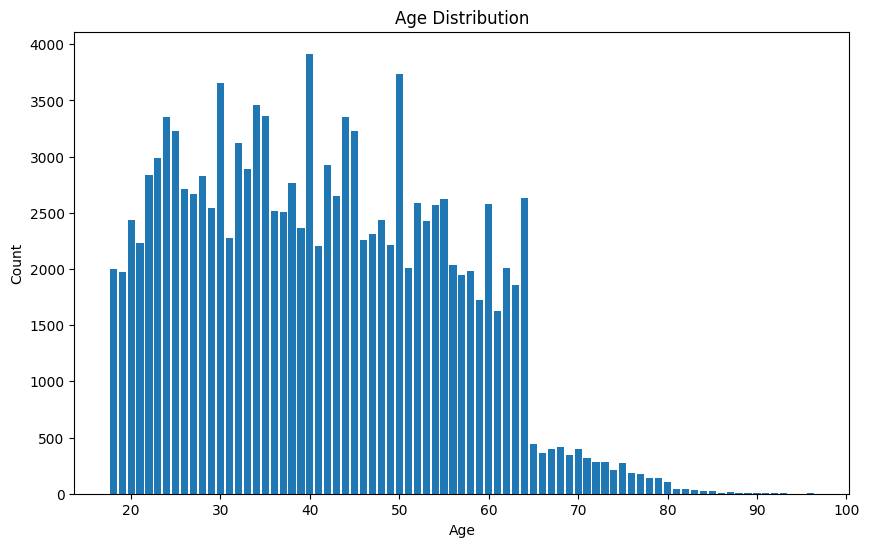

In [85]:
# 1:Visualisation of age and fear of failure
age_distribution = df.age.value_counts()

# plot age distributino
plt.figure(figsize=(10, 6))
plt.bar(age_distribution.index, age_distribution.values)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

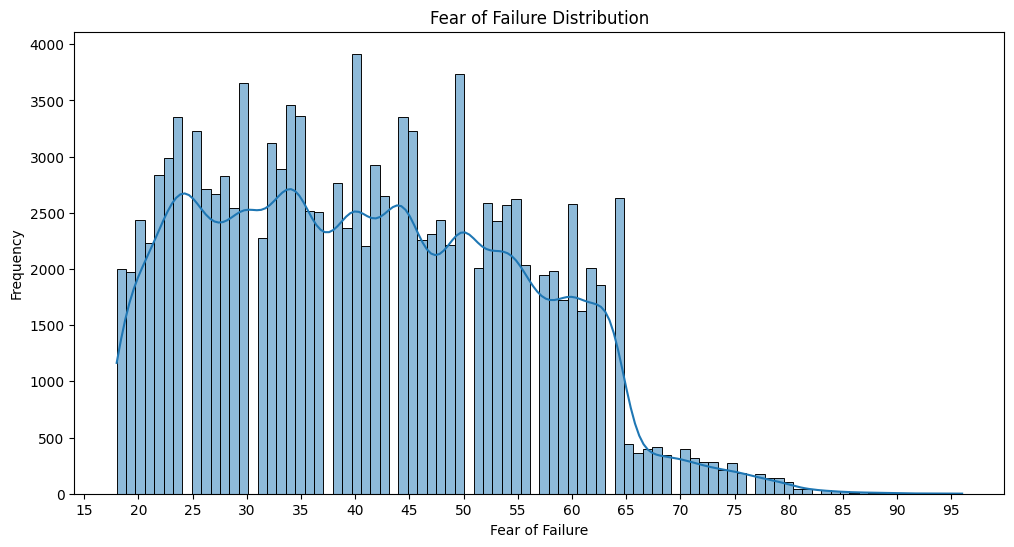

In [86]:
# KDE with histplot
plt.figure(figsize=(12, 6))

# Driver Age Distribution
sns.histplot(df['age'], kde=True)
plt.title('Fear of Failure Distribution')

# Adding additional labels for more readability
#plt.xticks(np.arange(df['driver_age'].min(), df['driver_age'].max()+1, 5))

#Alternatively:
plt.locator_params(axis='x', nbins=20)



plt.xlabel('Fear of Failure')
plt.ylabel('Frequency')
plt.show()

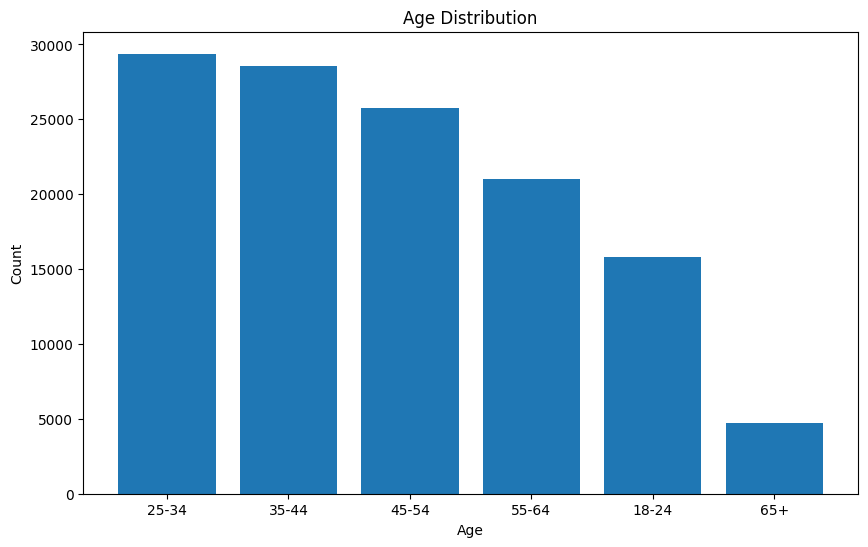

In [87]:
# simplified version with new_age
age_distribution = df.age_cat.value_counts()
plt.figure(figsize=(10, 6))
plt.bar(age_distribution.index, age_distribution.values)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

In [88]:
(df.age < 64).sum()

119916

In [89]:
(df.age > 64).sum()

4689

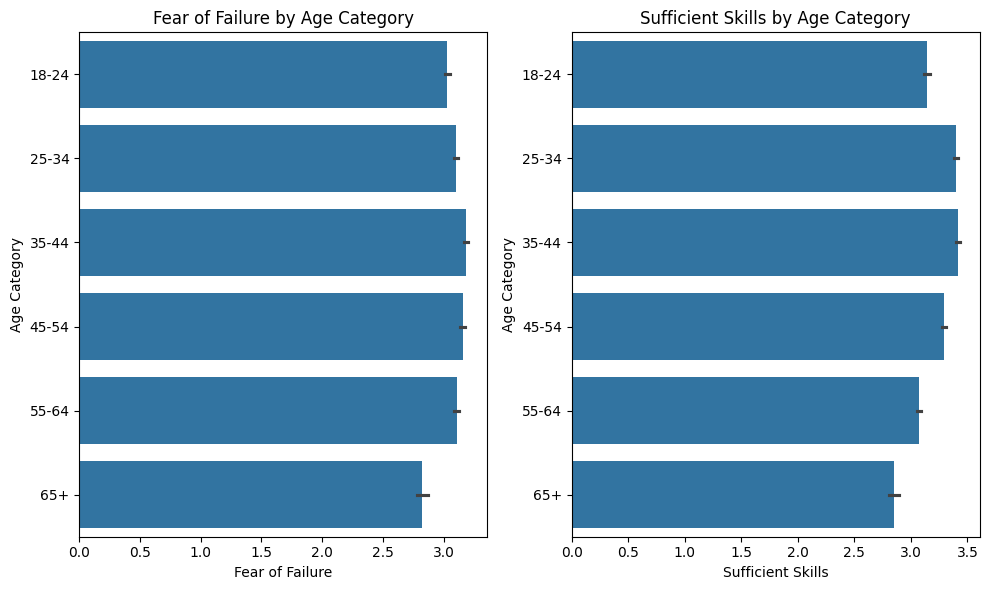

In [90]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='fearfaill', y='age_cat', data=df, orient='h')
plt.ylabel('Age Category')
plt.xlabel('Fear of Failure')
plt.title('Fear of Failure by Age Category')

plt.subplot(1, 2, 2)
sns.barplot(x='suskilll', y='age_cat', data=df, orient='h')
plt.ylabel('Age Category')
plt.xlabel('Sufficient Skills')
plt.title('Sufficient Skills by Age Category')

plt.tight_layout()
plt.show()

In [91]:
# Grouping fear of failure by age category and gender
fearfaill_rate_by_group = df.groupby(['age_cat', 'gender'])['fearfaill'].mean() * 100
fearfaill_rate_by_group

<ipython-input-91-53173ce083d4>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fearfaill_rate_by_group = df.groupby(['age_cat', 'gender'])['fearfaill'].mean() * 100


age_cat  gender
18-24    female    314.457209
         male      292.231446
25-34    female    321.357257
         male      300.527128
35-44    female    327.300435
         male      309.828193
45-54    female    324.482704
         male      307.227904
55-64    female    318.397795
         male      303.182468
65+      female    291.838352
         male      271.824480
Name: fearfaill, dtype: float64

In [92]:
fearfaill_rate_by_group.sort_values(ascending=False)

,,fearfaill
age_cat,gender,
35-44,female,327.300435
45-54,female,324.482704
25-34,female,321.357257
55-64,female,318.397795
18-24,female,314.457209
35-44,male,309.828193
45-54,male,307.227904
55-64,male,303.182468
25-34,male,300.527128


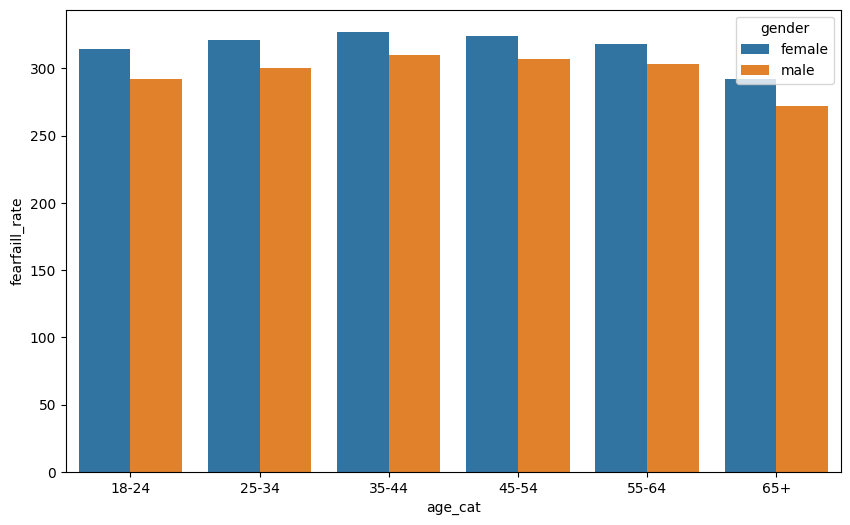

In [93]:
# Let's plot it
fearfaill_rate_by_group_df = fearfaill_rate_by_group.reset_index()
fearfaill_rate_by_group_df.columns = ['age_cat', 'gender', 'fearfaill_rate']

plt.figure(figsize=(10, 6))
sns.barplot(x='age_cat', y='fearfaill_rate', hue='gender', data=fearfaill_rate_by_group_df)
plt.show()

##Multivariate

<Axes: >

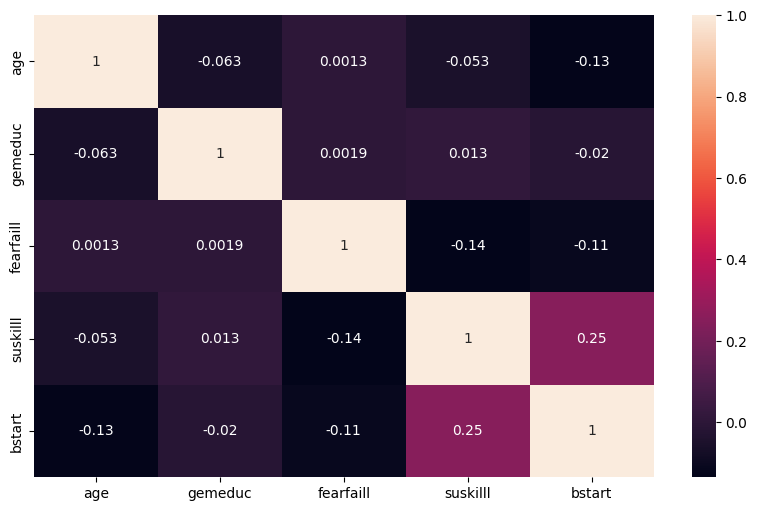

In [94]:
# Heatmap
# Correlation in the highlighted data
df_corr = df.drop(['age_cat', 'gender'],axis=1).corr()
plt.figure(figsize=(10, 6))
sns.heatmap(df_corr, annot=True)

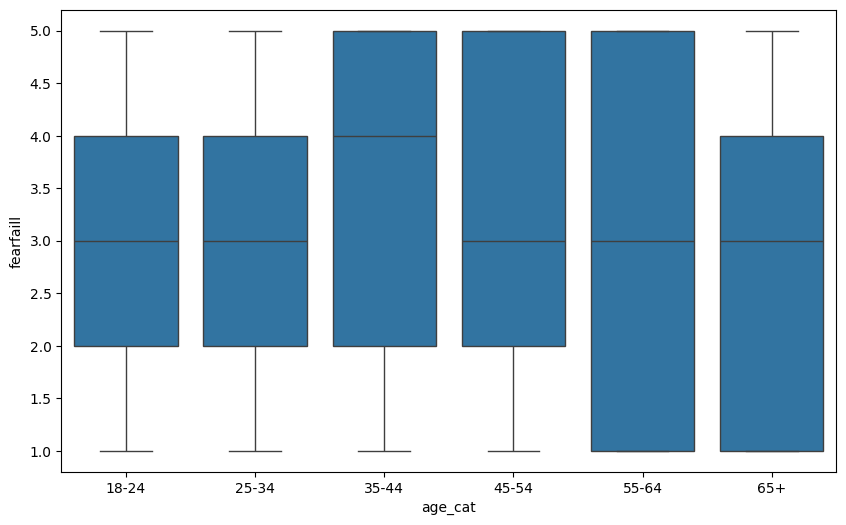

In [95]:
# Time for Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='age_cat', y='fearfaill', data=df)
plt.show()

In [96]:
# Probability of male and female having a high fear of failure
print(df[(df.gender == 'male') & (df.fearfaill > 3)].shape[0] / df[df.gender == 'male'].shape[0])
print(df[(df.gender == 'female') & (df.fearfaill > 3)].shape[0] / df[df.gender == 'female'].shape[0])

0.46031770346655226
0.5121947282617468


#Optional bonus task


In [97]:
# H0:There is no link between age group and fear of failure
# H1: Theris a link between age group and fear of failure
# Chi squared-test:
from scipy.stats import chi2_contingency

crosstab = pd.crosstab(df['age_cat'], df['fearfaill'])
chi2, p, dof, expected = chi2_contingency(crosstab)
print("Chi-squared value:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)

Chi-squared value: 1008.8126891875515
p-value: 5.154337528814361e-201
Degrees of freedom: 20
